### Importing the required libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Locally weighted Linear Regression

When our data is non-linear, Linear Regression would end up giving us large errors as it wtries to fit a straight line. The aim behind Locally weighted Linear Regression is that we give our model certain $x$ where we want to make the predictions. The model then gives all the $x_i$ around that $x$ a higher weight close to one, and the rest of $x_i$ get a lower weight close to zero. A straight line is then fit to that weighted $x_i$'s data.

We have defined the following functions below:

```1. weighted_matrix() function:```
The function computes the Weighted Matrix for all the datapoints in the dataset. In Linear Regression, we had the following loss function:

$$ J(w) = \sum_{i=1}^{m} (y^i - \theta^Tx^i)^2 $$

whereas, for locally weighted Linear Regression, the loss function is odified as follows:

$$ J(w) = \sum_{i=1}^{m} w^i(y^i - \theta^Tx^i)^2 $$

where,

$$ w^i = exp(\frac{-(x^i - x)^T(x^i - x)}{2}) $$

$$ \text{$w^i$ = weight for the $i$th training sample} $$
$$ \text{$x^i$ = $i$th training sample} $$
$$ \text{$x$ = point where we want to make the prediction} $$

```2. locally_weighted_linear_regression() function:```
In this function, we directly compute the value of $\theta$ using the following formula:

$$ \theta = (X^TWX)^{-1}(X^TWY) $$

Once we have computed $\theta$, in order to find the prediction or "hypothesis", we use the following:

$$ \text{hypothesis} = \theta^TX$$

In [13]:
def weighted_matrix(x_i, augmented_x, tau):
    # x_i -> the point x where we have to make the prediction
    # augmented_x -> entire training data
    # tau -> bandwidth of the Gaussian bell-shaped curve of the weighing function
    
    # the total number of training samples
    n = augmented_x.shape[0] 

    # initialising W = identity matrix of dimension nxn
    w = np.mat(np.eye(n), dtype=np.float64)
    
    # for every training sample -> updating the weights matrix as follows:
    for each_row in range(0, n):
        w[each_row, each_row] = np.exp(-(np.dot(augmented_x[each_row][np.newaxis,:]-x_i[np.newaxis,:], (augmented_x[each_row][np.newaxis,:]-x_i[np.newaxis,:]).T))/(2*tau**2))
    
    return w

In [14]:
def locally_weighted_linear_regression(augmented_x, true_y, x_i, tau):

    # calculating the weighted matrix
    w = weighted_matrix(x_i, augmented_x, tau)

    # calculayting theta using the formula mentioned above
    temp = np.linalg.inv(augmented_x.T * (w *augmented_x))
    temp2 = augmented_x.T * np.dot(w,true_y)
    theta = temp*temp2 
    temp3 = theta.T
    temp4 = x_i[np.newaxis,:].T
    hypothesis = np.matmul(temp3, temp4)

    return theta, hypothesis

### Importing the required dataset

We have used the Portland House Price Prediction dataset which consists of 47 datapoints. For ease of computation, we have only used the Living Area feature. We have also augmented the dataset by adding a column consisting of all values equal to 1 to the start of the dataset.

In [15]:
# reading the txt file and converting it into csv file
df = pd.read_csv("portland_data.txt", header = None)
# adding the column names
df.columns = ['living_area', '#bedrooms', 'price']
# storing this dataframe in a csv file
df.to_csv('portland_house_data.csv', index = None)
df.head()

,living_area,#bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [16]:
# dropping the number of bedrooms column
df = df.drop(['#bedrooms'], axis = 1)
df.head()

,living_area,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [17]:
# creating the augmented column
temp = [1 for i in range(0, df.shape[0])]
df.insert(0, 'x0', temp)
df.head()

,x0,living_area,price
0,1,2104,399900
1,1,1600,329900
2,1,2400,369000
3,1,1416,232000
4,1,3000,539900


### Separating the dataset into X and Y

In [18]:
x_df = df.iloc[:, 0:-1]
x_df.head()

,x0,living_area
0,1,2104
1,1,1600
2,1,2400
3,1,1416
4,1,3000


In [19]:
y_df = df.iloc[:, -1]
y_df.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [20]:
augmented_x = x_df.to_numpy()
true_y = y_df.to_numpy()
true_y = np.array(true_y).reshape(true_y.size, 1) 

### Plotting the Predictions

We predict the prices for 70 evenly spaced points ($x$) that are chosen in the domain of our Living Area feature. We have chosen a large value of tau ($\tau$) to incorporate our sufficiently large values of Y (prices of the houses). After choosing 70 evenly spaced points, we augment the same and use the earlier defined locally_weighted_linear_regression() function to generate the predictions. A scatter plot consisting of our initial data and predictions is then plotted as shown:

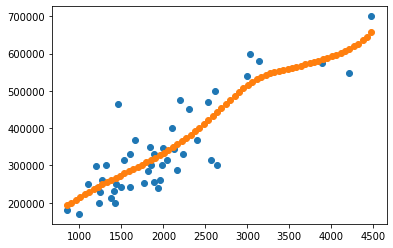

In [21]:
tau = 500

# array to store our predictions
predicted_y = [] 

living_area = df.iloc[:, 1:-1]
living_area_feature = living_area.to_numpy()

# choosing 70 evenly spaced points from our dataset
X_test = np.linspace(min(living_area_feature), max(living_area_feature), 70)
X_test_aug = np.empty(shape=(70,2))

for i in range(0,X_test.size):
    temp = X_test[i][0]
    X_test_aug[i][0] = 1
    X_test_aug[i][1] = temp

n = len(X_test)

# predicting the y values for all points in the dataset
for each_sample in X_test_aug: 
    theta, prediction = locally_weighted_linear_regression(augmented_x, true_y, each_sample, tau) 
    predicted_y.append(prediction)

X_test = np.array(X_test).reshape(n, 1) 
predicted_y = np.array(predicted_y).reshape(n, 1) 

# creating a scatter plot for the given initial test data 
plt.scatter(living_area_feature, true_y)
# plotting the values for predicted y
plt.scatter(X_test, predicted_y) 
plt.show()